In [37]:
import numpy as np
import pandas as pd
import spacy
import re
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
from wordcloud import WordCloud, STOPWORDS
import math
from scipy.stats import chi2_contingency, chisquare, chi2
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
trump_df = pd.read_csv('trump_tweet_senti.csv', lineterminator='\n')

In [7]:
trump_df

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,lang,Polarity,Subjectivity,Sentiment\r
0,2020-10-15 00:00:02,"['trump', 'student', 'used', 'hear', 'years', ...",2.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,ENGLISH,0.333333,0.333333,1.0
1,2020-10-15 00:00:02,"['2', 'hours', 'since', 'last', 'tweet', 'trum...",0.0,0.0,Trumpytweeter,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.066667,0.222222,1.0
2,2020-10-15 00:00:08,"['get', 'tie', 'get', 'tie', 'trump', 'rally',...",4.0,3.0,Twitter for iPhone,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,ENGLISH,0.000000,0.000000,0.0
3,2020-10-15 00:00:17,"['15', 'minutes', 'long', 'time', 'ago', 'omar...",2.0,0.0,Twitter for Android,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,ENGLISH,-0.108333,0.416667,-1.0
4,2020-10-15 00:00:17,"['glad', 'u', 'got', 'house', 'dicktrump', '20...",0.0,0.0,Twitter for iPhone,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.500000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673202,2020-11-08 23:59:38,"['stop', 'laying', 'paris', 'london', 'dont', ...",0.0,0.0,Twitter for iPhone,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,ENGLISH,-0.400000,0.600000,-1.0
673203,2020-11-08 23:59:42,"['earlier', 'week', 'got', 'rid', 'trump', 'to...",7.0,0.0,Twitter Web App,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,-0.033333,0.666667,-1.0
673204,2020-11-08 23:59:48,"['joe', 'biden', 'joe', 'biden', 'winned', 'tr...",4.0,0.0,Twitter Web App,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,-0.150000,0.650000,-1.0
673205,2020-11-08 23:59:54,"['first', 'would', 'need', 'compare', 'previou...",0.0,0.0,Twitter for iPad,1079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.130556,0.233333,1.0


In [42]:
X = trump_df["tweet"]
Y = trump_df["Sentiment\r"]

In [22]:
vectorizer = TfidfVectorizer()
X_tfid = vectorizer.fit_transform(X)


In [25]:
X_tfid_train, X_tfid_test, Y_tfid_train, Y_tfid_test = train_test_split(X_tfid, Y, test_size=0.33)

In [27]:
nb = MultinomialNB()
nb.fit(X_tfid_train, Y_tfid_train)
predictions = nb.predict(X_tfid_test)

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(Y_tfid_test, predictions, pos_label=1)
print("Multinomial naive bayes AUC: {0}".format(metrics.auc(fpr, tpr)))

Multinomial naive bayes AUC: 0.8162066539512849


In [35]:
params = {'alpha': [0.01, 0.1, 0.3, 0.5, 1.0, 10.0],}

with tf.device('/GPU:0'):
    #logist=LogisticRegression()
    nb_cv=GridSearchCV(nb,param_grid=params,cv=5)
    nb_cv.fit(X_tfid_train,Y_tfid_train)

    #print("tuned hpyerparameters :(best parameters) ",logist_cv.best_params_)
    print("accuracy :",nb_cv.best_score_)
    y_nb_pred = nb_cv.predict(X_tfid_test)
    print(classification_report(Y_tfid_test, y_nb_pred))

accuracy : 0.7760748273010257
              precision    recall  f1-score   support

        -1.0       0.82      0.60      0.69     50659
         0.0       0.90      0.78      0.84     91819
         1.0       0.68      0.90      0.77     79681

    accuracy                           0.78    222159
   macro avg       0.80      0.76      0.77    222159
weighted avg       0.80      0.78      0.78    222159



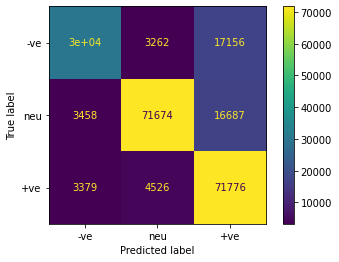

In [38]:
pred_matrix = metrics.confusion_matrix(Y_tfid_test, y_nb_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=pred_matrix, display_labels=["-ve", "neu", "+ve"])
disp1.plot() 

In [41]:
with tf.device('/GPU:0'):
    Y_pred = nb_cv.predict(X)
    print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

        -1.0       0.89      0.67      0.77    153851
         0.0       0.93      0.83      0.88    277706
         1.0       0.74      0.93      0.82    241650

    accuracy                           0.83    673207
   macro avg       0.85      0.81      0.82    673207
weighted avg       0.85      0.83      0.83    673207



In [43]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [45]:
with tf.device('/GPU:0'):
    max_len = 500
    tok = Tokenizer(num_words=2000)
    tok.fit_on_texts(X)
    sequences = tok.texts_to_sequences(X)
    sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [46]:
X_tf_train, X_tf_test, Y_tf_train, Y_tf_test = train_test_split(sequences_matrix, Y, test_size=0.3)

In [54]:
def tensorflow_based_model():
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dropout(0.5)(layer)
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('selu')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model

In [55]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='mae',optimizer="adam",metrics=['accuracy'])

In [56]:
with tf.device('/GPU:0'):
    history=model.fit(X_tf_train,Y_tf_train,batch_size=80,epochs=10, validation_split=0.1)

Epoch 1/10
5302/5302 [==============================] - 155s 29ms/step - loss: 0.2866 - accuracy: 0.6629 - val_loss: 0.1579 - val_accuracy: 0.7245
Epoch 2/10
5302/5302 [==============================] - 152s 29ms/step - loss: 0.1647 - accuracy: 0.7256 - val_loss: 0.1372 - val_accuracy: 0.7305
Epoch 3/10
5302/5302 [==============================] - 157s 30ms/step - loss: 0.1579 - accuracy: 0.7274 - val_loss: 0.1378 - val_accuracy: 0.7300
Epoch 4/10
5302/5302 [==============================] - 154s 29ms/step - loss: 0.1527 - accuracy: 0.7278 - val_loss: 0.1264 - val_accuracy: 0.7297
Epoch 5/10
5302/5302 [==============================] - 156s 29ms/step - loss: 0.1513 - accuracy: 0.7278 - val_loss: 0.1424 - val_accuracy: 0.7307
Epoch 6/10
5302/5302 [==============================] - 156s 29ms/step - loss: 0.1487 - accuracy: 0.7283 - val_loss: 0.1317 - val_accuracy: 0.7282
Epoch 7/10
5302/5302 [==============================] - 155s 29ms/step - loss: 0.1485 - accuracy: 0.7277 - val_loss: 0

In [62]:
def tensorflow_based_model2():
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dropout(0.5)(layer)
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('linear')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model
model2 = tensorflow_based_model2() # here we are calling the function of created model
model2.compile(loss='mae',optimizer="adam",metrics=['accuracy'])

In [63]:
with tf.device('/GPU:0'):
    history=model2.fit(X_tf_train,Y_tf_train,batch_size=80,epochs=7, validation_split=0.1)

Epoch 1/7
5302/5302 [==============================] - 156s 29ms/step - loss: 0.2945 - accuracy: 0.6657 - val_loss: 0.1854 - val_accuracy: 0.7290
Epoch 2/7
5302/5302 [==============================] - 153s 29ms/step - loss: 0.1734 - accuracy: 0.7251 - val_loss: 0.1608 - val_accuracy: 0.7304
Epoch 3/7
5302/5302 [==============================] - 153s 29ms/step - loss: 0.1630 - accuracy: 0.7262 - val_loss: 0.1454 - val_accuracy: 0.7307
Epoch 4/7
5302/5302 [==============================] - 153s 29ms/step - loss: 0.1591 - accuracy: 0.7270 - val_loss: 0.1486 - val_accuracy: 0.7312
Epoch 5/7
5302/5302 [==============================] - 154s 29ms/step - loss: 0.1577 - accuracy: 0.7271 - val_loss: 0.1491 - val_accuracy: 0.7308
Epoch 6/7
5302/5302 [==============================] - 153s 29ms/step - loss: 0.1558 - accuracy: 0.7282 - val_loss: 0.1354 - val_accuracy: 0.7319
Epoch 7/7
5302/5302 [==============================] - 152s 29ms/step - loss: 0.1526 - accuracy: 0.7302 - val_loss: 0.1393 -

In [74]:
def tensorflow_based_model3():
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(64, activation='relu')(layer) #step4
    layer = Dense(1,name='out_layer')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model
model3 = tensorflow_based_model3() # here we are calling the function of created model
model3.compile(loss='mae',optimizer="adam",metrics=['accuracy'])

In [75]:
with tf.device('/GPU:0'):
    history=model3.fit(X_tf_train,Y_tf_train,batch_size=80,epochs=7, validation_split=0.1)

Epoch 1/7
5302/5302 [==============================] - 151s 28ms/step - loss: 0.2290 - accuracy: 0.6781 - val_loss: 0.1335 - val_accuracy: 0.7310
Epoch 2/7
5302/5302 [==============================] - 150s 28ms/step - loss: 0.1293 - accuracy: 0.7249 - val_loss: 0.1268 - val_accuracy: 0.7263
Epoch 3/7
5302/5302 [==============================] - 149s 28ms/step - loss: 0.1235 - accuracy: 0.7271 - val_loss: 0.1262 - val_accuracy: 0.7309
Epoch 4/7
5302/5302 [==============================] - 151s 28ms/step - loss: 0.1214 - accuracy: 0.7274 - val_loss: 0.1221 - val_accuracy: 0.7282
Epoch 5/7
5302/5302 [==============================] - 152s 29ms/step - loss: 0.1186 - accuracy: 0.7270 - val_loss: 0.1200 - val_accuracy: 0.7307
Epoch 6/7
5302/5302 [==============================] - 152s 29ms/step - loss: 0.1262 - accuracy: 0.7253 - val_loss: 0.1208 - val_accuracy: 0.7288
Epoch 7/7
5302/5302 [==============================] - 152s 29ms/step - loss: 0.1153 - accuracy: 0.7296 - val_loss: 0.1232 -

## This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%.